<a href="https://colab.research.google.com/github/FatimaEzzedinee/ML-bachelor-course-labs-sp24/blob/main/02_classification_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning SP 2023/2024

- Prof. Cesare Alippi
- Alvise Dei Rossi ([`alvise.dei.rossi@usi.ch`](mailto:alvise.dei.rossi@usi.ch))<br>
- Fatima Ezzeddine ([`fatima.ezzeddine@usi.ch`](mailto:fatima.ezzeddine@usi.ch))<br>
- Alessandro Manenti ([`alessandro.manenti@usi.ch`](mailto:alessandro.manenti@usi.ch))

---

# Lab 02: Classification

---

# A) **Goal**: classify linearly separable synthetic data

We have a $d$-dimensional input vector $X \in \mathbb{R}^d$ and a set of $k$ possible classes, $C_1, \dots, C_k$.
Our goal in classification is to assign $X$ to the correct class.

In particular, our goal is to determine a __discriminant__ function to partition the input space. In this session we will focus on binary classification.

![alt text](https://jakelearnsdatascience.files.wordpress.com/2017/02/lda_binary.png)

# A.1) Collect and prepare data

In [13]:
# first we define some helper functions to generate data and plot results
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_moons
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "bwr" # Define the colors to use in the plot
plt.rcParams["scatter.edgecolors"] = 'k'


# function to generate classification problems
def get_data(n, ctype, noise_scale=1):
  if ctype == 'simple':
    x, y = make_classification(n_features=2, # we consider a simple problem with only 2 features (we can visualize them!)
                               n_redundant=0, # there's no feature which is a linear combination of the informative features
                               n_informative=2, # all features are informative
                               n_clusters_per_class=1) # the same class is not divided in several clusters
    x += np.random.uniform(size=x.shape)*noise_scale # adds some noise
  elif ctype == 'circles':
    x, y = make_circles(n, noise=0.1, factor=0.5) # the radius of the inner circle is half of the outer's
  else:
    raise ValueError
  return x, y

# function to plot decision boundaries
def plot_decision_surface(model, x, y, transform=lambda x:x, with_probability=False):
  #init figure
  fig = plt.figure()

  # Create mesh
  h = .01  # step size in the mesh
  # consider plotting bounds by looking at minimum and maximum for each feature
  x1_min, x1_max = x[:, 0].min() - .5, x[:, 0].max() + .5
  x2_min, x2_max = x[:, 1].min() - .5, x[:, 1].max() + .5
  # we consider
  xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                        np.arange(x2_min, x2_max, h))

  if with_probability == False:
    y_pred = model.predict(transform(np.c_[xx.ravel(), yy.ravel()])) # we get predictions for all points in the grid

    y_pred = y_pred.reshape(xx.shape)

    # plot background color
    plt.contourf(xx, yy, y_pred > 0.5, alpha=.5)
  else:
    y_proba = model.predict_proba(transform(np.c_[xx.ravel(), yy.ravel()]))

    y_proba = 1- y_proba[:,0].reshape(xx.shape[0], xx.shape[1])

    # plot background color
    plt.imshow(y_proba, alpha=.5, extent=[x1_min, x1_max, x2_min, x2_max], origin='lower')
    plt.colorbar(label='Probability of being RED')


  # plot train data
  plt.scatter(x[:, 0], x[:, 1], c=y) # color the points based on the labels

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')


Text(0, 0.5, '$x_2$')

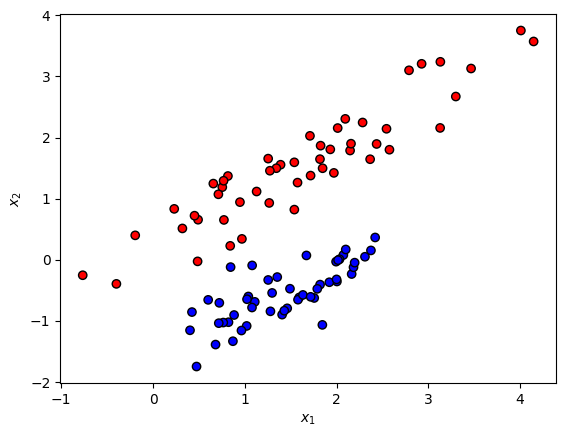

In [14]:
np.random.seed(42)

# Create a classification problem
x, y = get_data(100, ctype='simple')

# Let's look at the data
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# A.2) Linear Discriminant Analysis

Bayes' theorem states:
$$
P(A | B) = \frac{P(B|A) P(A)}{P(B)}
$$

If A is the event "$Y_i$ = k"

and B is the event "$X_i$ = x"

we have seen in class that a **Bayes classifier** can be built:
$$
P(Y_i = k | X_i = x) = \frac{P(X_i = x|Y_i = k) P(Y_i = k)}{P(X_i = x)}
$$

<br/><br/><br/><br/><br/>
**Linear Discriminant Analysis (LDA)** makes 2 main assumptions on the data generating process:

1) The likelihoods P($X_i$ = x|$Y_i$ = k) are Gaussian probability density functions

2) All the Gaussians have the same covariance matrix $\Sigma$

This way Bayes' theorem can be written as:
$$
P(Y_i = k | X_i = x) = \frac{\pi_k f_k(x)}{\Sigma_{l=1}^K \pi_l f_l(x)}
$$

with
$$
f_k(x) = \frac{1}{(2\pi)^{p/2} |\Sigma|^{1/2}} e^{-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)}
$$
and
$$
\pi_k = P(Y_i = k)
$$

The predicted class for $Y_i$ will be
$$
argmax_k(P(Y_i = k | X_i = x)) = argmax_k(log(P(Y_i = k | X_i = x)))
$$

If we compute $log(P(Y_i = k | X_i = x))$ (removing k-independent terms) we get:

$$
log(P(Y_i = k | X_i = x)) \equiv \boxed{\delta_k(x)} = \boxed{x^T \Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + log(\pi_k)}
$$

**That is LINEAR** in x

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

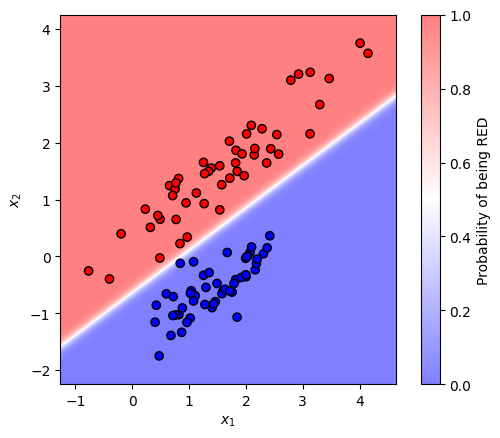

In [16]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(x, y)

plot_decision_surface(classifier, x, y, with_probability=True)

The decision boundary of LDA is linear. In the example shown above LDA is able to descriminate perfectly between the two classes. What happens if you increase the noise in the data generating process? Try, and plot the decision boundary.

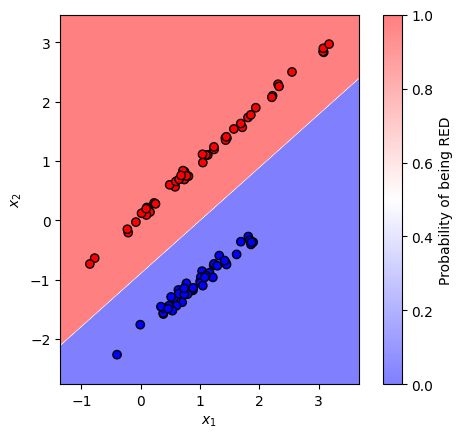

In [23]:
np.random.seed(42)

# Create a classification problem
x_noisy, y_noisy = get_data(100, ctype='simple', noise_scale=0)

classifier = LinearDiscriminantAnalysis()
classifier.fit(x_noisy, y_noisy)

plot_decision_surface(classifier, x_noisy, y_noisy, with_probability=True)

# A.3) Logistic Regression
The Logistic Regression classifier makes an assumption on the posterior:

$$\boxed{Pr(y_i=1\vert x_i, \boldsymbol \theta)} = \sigma(x_i^\top\boldsymbol \theta) = \boxed{\frac{1}{1+e^{-x_i^\top\boldsymbol \theta}}}
$$

Where $\sigma({}\cdot{})$ is the _sigmoid_ function:

<img style="text-align: center" src="https://miro.medium.com/v2/resize:fit:970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width="500">

For 1 sample the probability can be written as:
$$
Pr(y_i\vert x_i, \boldsymbol \theta) = \sigma_i^{y_i}(1 - \sigma_i)^{1-y_i}
$$

For n samples the joint probability is:
$$
Pr(y_1, y_2, ..., y_n\vert x_1, x_2, ..., x_n,  \boldsymbol \theta) = \Pi_i^n\sigma_i^{y_i}(1 - \sigma_i)^{1-y_i}
$$

Maximizing the joint probability is equivalent to maximizing its logarithm:
$$
l(\boldsymbol \theta) = \Sigma_i(y_ilog(\sigma_i) + (1 - y_i)log(1 - \sigma_i))
$$

and
$$
\hat{\theta} = argmax_{\theta}(l(\theta))
$$


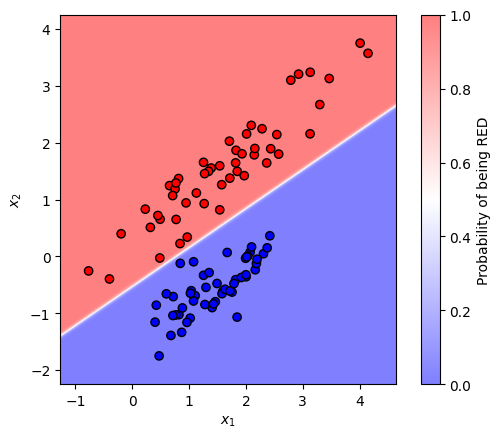

In [24]:
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
x, y = get_data(100, ctype='simple')

classifier = LogisticRegression(penalty=None) # create an instance of the model
classifier.fit(x, y)              # fit the data

plot_decision_surface(classifier, x, y, with_probability=True)

Logistic Regression is often referred to as a **generalized linear method**. Indeed, even if the model is nonlinear, the predicted class depends only on the linear combination $x_i^\top \boldsymbol \theta$ of the input variables. In other words, the decision surfaces are **linear**.

Indeed, the decision boundary of the binary logistic regression model that we built can be written as:

$$x_2 = -\frac{\theta_0}{\theta_2} - \frac{\theta_1}{\theta_2} x_1$$

_Exercise: show why this is true (reminder: the decision boundary is the line where the probability of both classes is 0.5)._

$$Pr(y_i=1\vert x_i, \boldsymbol \theta) = \sigma(x_i^\top\boldsymbol \theta) = \frac{1}{1+e^{-x_i^\top\boldsymbol \theta}} = 0.5
$$
$$e^{-x_i^\top\boldsymbol \theta} = 1$$
$$-x_i^\top\boldsymbol \theta = 0$$
$$-(\theta_0+\theta_1 x_1 + \theta_2 x_2) = 0$$
$$x_2 = -\frac{\theta_0}{\theta_2} - \frac{\theta_1}{\theta_2} x_1$$

Solution:

Classifier Intercept: [26.04350492]
Classifer Angular coeffs.: [[-33.40470114  48.61461615]]


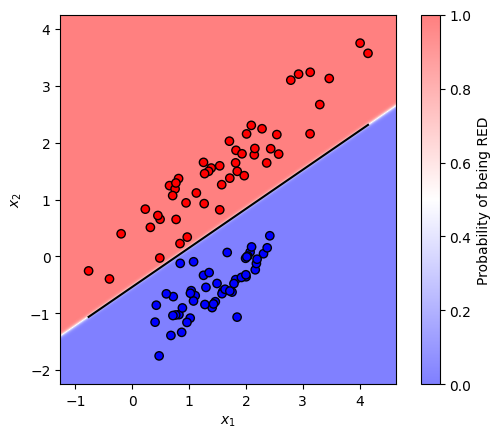

In [25]:
print(f'Classifier Intercept: {classifier.intercept_}')
print(f'Classifer Angular coeffs.: {classifier.coef_}')

theta = [classifier.intercept_, classifier.coef_[0,0], classifier.coef_[0,1]]

b = -theta[0]/theta[2]
m = -theta[1]/theta[2]

x1 = np.array([x[:,0].min(), x[:,0].max()])
x2 = b + m * x1

plot_decision_surface(classifier, x, y, with_probability=True)
plt.plot(x1, x2, c='black')

---

# B) **Goal**: classify non-linearly separable synthetic data

# B.1) Prepare data

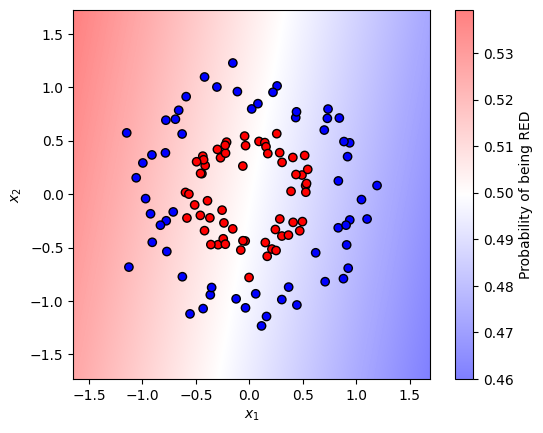

In [26]:
np.random.seed(0)

x,y = get_data(120, 'circles')

classifier = LogisticRegression(penalty=None)
classifier.fit(x, y)

plot_decision_surface(classifier, x, y, with_probability=True)

#### Task: How would you solve this problem?

Can you think of another coordinate system that improves the representation for a model which can only linearly separate the data?

Remember: the linearity is in the input variables! We can use some nonlinear features to project the data in a space where they are separable with a straight line.

Let's try with polar coordinates.
$$
\left\{\begin{array}{rl}
x&=r \cos \phi \\
y&=r \sin \phi
\end{array}
\right. \implies
\left\{
  \begin{array}{rl}
r&=\sqrt{x^2 + y^2}\\
\phi&= {atan2}\left(y,x\right)
\end{array}
\right.
$$

<img src="https://www.linearmotiontips.com/wp-content/uploads/2019/10/Polar-Cartesian-Coordinates-Feature.jpg" width="500"/>



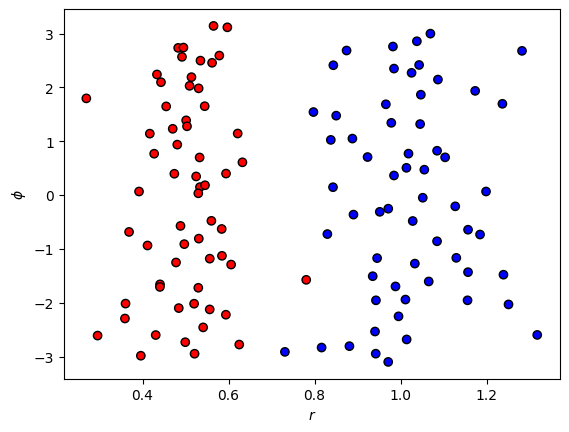

In [27]:
def transform_fn(x):
  r = np.sqrt(np.square(x).sum(axis=1))
  phi = np.arctan2(x[:,1], x[:,0])
  return np.c_[r, phi]

x_transformed = transform_fn(x)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y)
plt.xlabel(r'$r$')
plt.ylabel(r'$\phi$')
plt.show()

Nice! Let's fit the model using the polar features.

# B.2) Logistic Regression

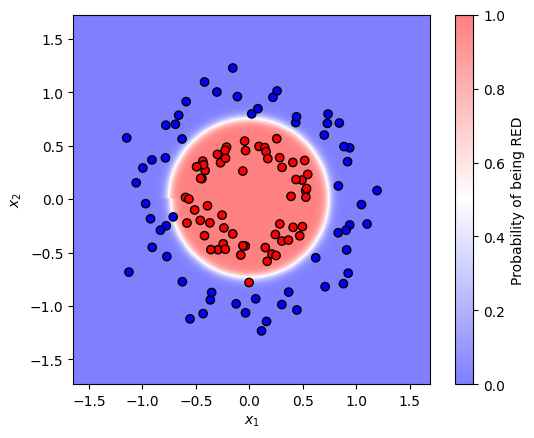

In [15]:
classifier = LogisticRegression(penalty=None)
classifier.fit(x_transformed, y)

plot_decision_surface(classifier, x, y, transform=transform_fn, with_probability=True)

It is not always easy to find suitable features/projections by hand.

In a future Lab session we will see how to use neural networks to solve classification problems.

## K-Nearest Neighbors

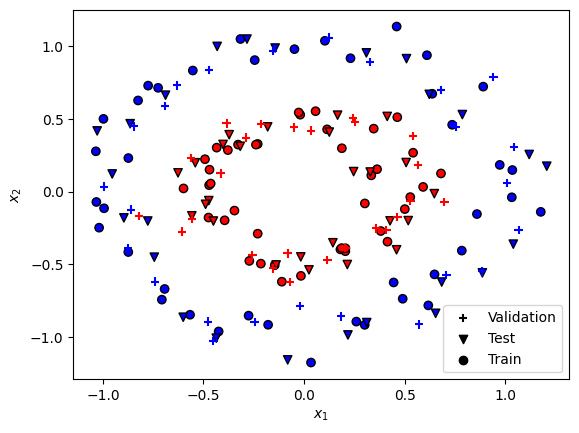

In [28]:
# Data
np.random.seed(42)

x_train, y_train = get_data(80, 'circles')
x_validation, y_validation = get_data(50, 'circles')
x_test, y_test = get_data(50, 'circles')

# Let's look at the data
plt.scatter(x_train[:, 0], x_train[:, 1], marker='o', c=y_train)
plt.scatter(x_test[:, 0], x_test[:, 1], marker="v", c=y_test)
plt.scatter(x_validation[:, 0], x_validation[:, 1], marker="+", c=y_validation)

# Phantom plots for legend
plt.scatter([],[],c="k",marker="+",label="Validation")
plt.scatter([],[],c="k",marker="v",label="Test")
plt.scatter([],[],c="k",marker="o",label="Train")

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

### Goal: find the optimal number $\hat{k}$ of k-nn to use.

Hint 1: look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Hint 2: Remember what train, validation and test sets are used for



| Set        | Usage                                                                                       |
| ---------- | ------------------------------------------------------------------------------------------- |
| Train      | used to fit your model                                                                      |
| Validation | used to choose the best hyperparameters (those parameters you have to set at the beginning) |
| Test       | used only once to have an estimate of your model's performance                              |


n_neigh: 1
Train Accuracy: 100.00%
Validation Accuracy: 96.00%
Test Accuracy: 100.00%


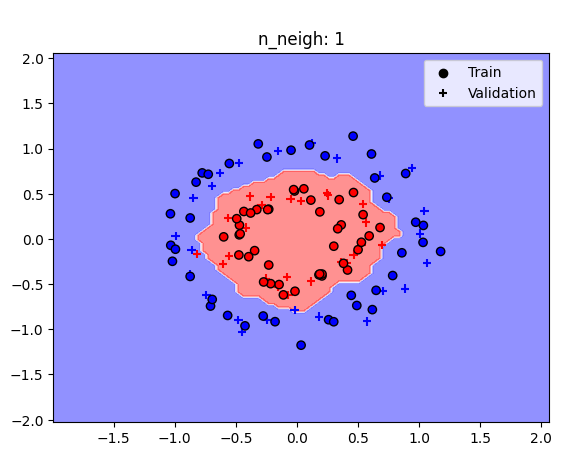


n_neigh: 3
Train Accuracy: 100.00%
Validation Accuracy: 96.00%
Test Accuracy: 100.00%


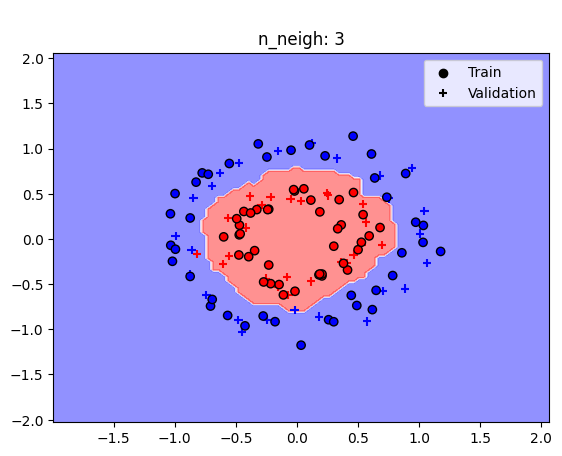


n_neigh: 5
Train Accuracy: 100.00%
Validation Accuracy: 98.00%
Test Accuracy: 100.00%


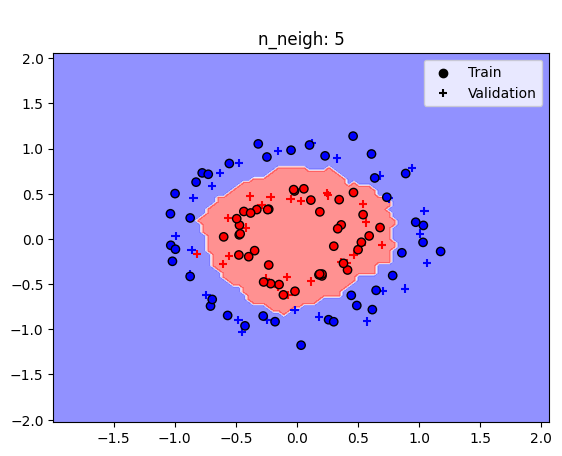


n_neigh: 11
Train Accuracy: 98.75%
Validation Accuracy: 96.00%
Test Accuracy: 98.00%


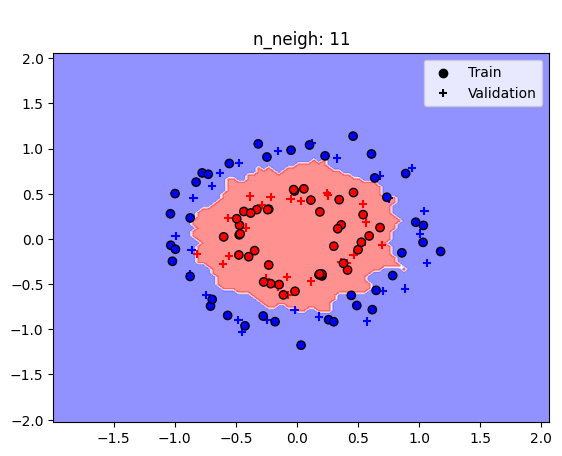


n_neigh: 21
Train Accuracy: 65.00%
Validation Accuracy: 58.00%
Test Accuracy: 56.00%


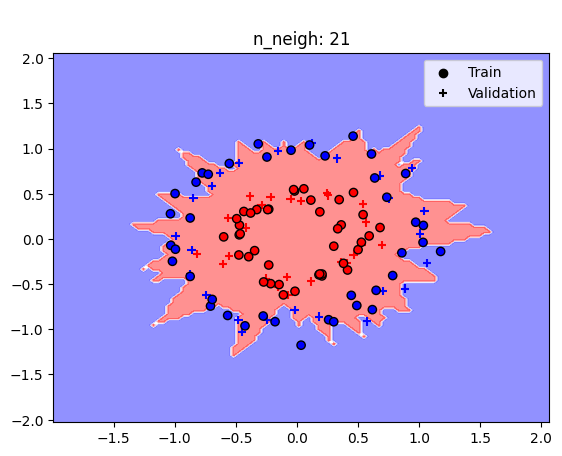


n_neigh: 41
Train Accuracy: 50.00%
Validation Accuracy: 50.00%
Test Accuracy: 50.00%


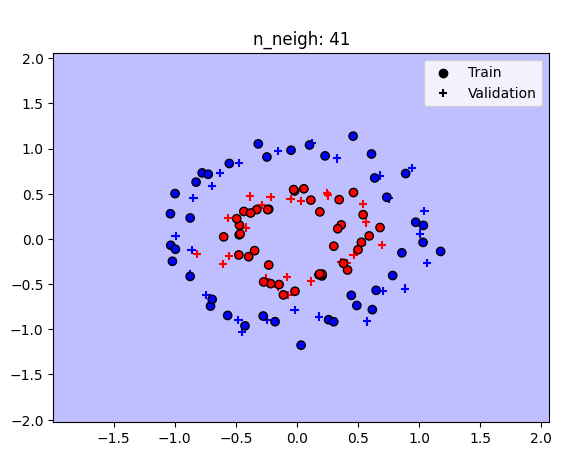

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

def calculate_and_print_accuracy(model, x, y_true, label):
    y_pred = model.predict(x)
    n_right_predictions = (y_pred == y_true).sum()
    print(f"{label} Accuracy: {100*n_right_predictions/len(y_true):.2f}%")


for n_neig in [1, 3, 5, 11, 21, 41]:
    print(f"\nn_neigh: {n_neig}")

    # Initialize and fit K-nn classifier
    classifier = KNeighborsClassifier(n_neighbors=n_neig)
    classifier.fit(x_train, y_train)

    # Calculate and print accuracy for Train, Validation and Test set
    calculate_and_print_accuracy(classifier, x_train, y_train, "Train")
    calculate_and_print_accuracy(classifier, x_validation, y_validation, "Validation")
    calculate_and_print_accuracy(classifier, x_test, y_test, "Test")

    # Plot Train and Validation points and classifier decision boundaries
    DecisionBoundaryDisplay.from_estimator(classifier, x_validation, response_method='predict', alpha=0.5)
    plt.scatter(x_validation[:, 0], x_validation[:, 1], marker='+', c=y_validation)
    plt.scatter(x_train[:, 0], x_train[:, 1], marker='o', c=y_train)
    # phantom plots for legend
    plt.scatter([],[],marker="o",c="k",label="Train")
    plt.scatter([],[],marker="+",c="k",label="Validation")
    plt.title(f"\nn_neigh: {n_neig}")
    plt.legend()
    plt.show()